In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.layers import Conv1D, Dense, TimeDistributed, MaxPooling1D, Flatten
from keras.layers import Dense, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
#Importing Data from CSV file
data=pd.read_csv("train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels=data.iloc[:,[0]].values

In [6]:
labels

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [7]:
pixels=data.drop(labels="label",axis=1)

In [8]:
pixels.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pix=np.array(pixels)

In [10]:
Expressions={0:"Zero",1:"One",2:"Two",3:"Three",4:"Four",5:"Five",6:"Six",7:"Seven",8:"Eight",9:"Nine"}


In [11]:


from keras.utils import to_categorical 
labels = to_categorical(labels,10)

In [12]:
labels.shape

(42000, 10)

In [15]:
#converting pixels to Gray Scale images of 48X48 
images = pix#np.array([np.fromstring(pixel, dtype=int, sep=",")for pixel in pix])
images=images/255.0
images = images.reshape(images.shape[0],28,28,1).astype('float32')

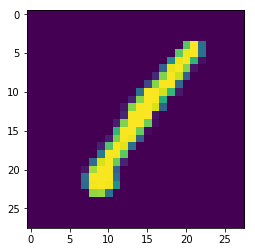

In [16]:
plt.imshow(images[0][:,:,0])
#Expressions[labels[0][0]]

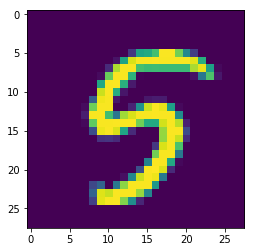

In [17]:
plt.imshow(images[8][:,:,0])
#Expressions[labels[2][0]]

In [17]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [18]:
train_images.shape , train_labels.shape

((33600, 28, 28, 1), (33600, 10))

In [18]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
     
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = Sequential()

# first set of CONV => RELU => POOL

model.add(Convolution2D(20,5,5,border_mode='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL

model.add(Convolution2D(50, 5, 5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# set of FC => RELU layers

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


In [19]:
classes=10
model = create_convolutional_model(classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
__________

In [108]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=15,verbose=2)

Epoch 1/15
 - 474s - loss: 0.2350 - acc: 0.9273
Epoch 2/15
 - 457s - loss: 0.0876 - acc: 0.9726
Epoch 3/15
 - 426s - loss: 0.0761 - acc: 0.9763
Epoch 4/15
 - 460s - loss: 0.0564 - acc: 0.9827
Epoch 5/15
 - 462s - loss: 0.0476 - acc: 0.9854
Epoch 6/15
 - 453s - loss: 0.0398 - acc: 0.9876
Epoch 7/15
 - 449s - loss: 0.0440 - acc: 0.9855
Epoch 8/15
 - 479s - loss: 0.0369 - acc: 0.9883
Epoch 9/15
 - 447s - loss: 0.0353 - acc: 0.9885
Epoch 10/15
 - 426s - loss: 0.0307 - acc: 0.9903
Epoch 11/15
 - 424s - loss: 0.0273 - acc: 0.9913
Epoch 12/15
 - 420s - loss: 0.0317 - acc: 0.9897
Epoch 13/15
 - 423s - loss: 0.0262 - acc: 0.9910
Epoch 14/15
 - 471s - loss: 0.0236 - acc: 0.9922
Epoch 15/15
 - 464s - loss: 0.0229 - acc: 0.9927


In [109]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

In [114]:
label_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [ ]:
#making confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [115]:
#Save the weights
filename='digitREC_weights_15epochs.hdf5'
model.save_weights(filename,overwrite=True)

In [19]:
#saving  hdf5 to model
filename='digitREC_weights_15epochs.hdf5'
model.load_weights(filename)

In [20]:
#creating model for full data
model.fit(images,labels,batch_size=105,epochs=15,verbose=2)

Epoch 1/15
 - 570s - loss: 0.2025 - acc: 0.9358
Epoch 2/15
 - 620s - loss: 0.0791 - acc: 0.9749
Epoch 3/15
 - 609s - loss: 0.0583 - acc: 0.9819
Epoch 4/15
 - 602s - loss: 0.0530 - acc: 0.9835
Epoch 5/15
 - 592s - loss: 0.0465 - acc: 0.9857
Epoch 6/15
 - 552s - loss: 0.0385 - acc: 0.9872
Epoch 7/15
 - 540s - loss: 0.0368 - acc: 0.9885
Epoch 8/15
 - 534s - loss: 0.0348 - acc: 0.9889
Epoch 9/15
 - 555s - loss: 0.0307 - acc: 0.9900
Epoch 10/15
 - 583s - loss: 0.0305 - acc: 0.9902
Epoch 11/15
 - 561s - loss: 0.0316 - acc: 0.9903
Epoch 12/15
 - 569s - loss: 0.0284 - acc: 0.9914
Epoch 13/15
 - 601s - loss: 0.0233 - acc: 0.9925
Epoch 14/15
 - 607s - loss: 0.0235 - acc: 0.9924
Epoch 15/15
 - 579s - loss: 0.0236 - acc: 0.9924


In [21]:
#Save the weights (total data)
filename='total_weights_15epochs.hdf5'
model.save_weights(filename,overwrite=True)

In [22]:
filename='total_weights_15epochs.hdf5'
model.load_weights(filename)

In [23]:
from keras.models import load_model
import cv2

In [24]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(28,28))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,28,28,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [25]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("digit.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.9,(205,200,50),2,cv2.LINE_AA)
        cv2.imshow('show your fucking face',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [ ]:
face_in_video()

In [4]:
import cv2
#cv2.DestroyWindow()

import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

# Load the classifier
clf = joblib.load("digits_cls.pkl")

# Read the input image 
im = cv2.imread("/home/bikz05/Desktop/photo8.jpg")

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()
